<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Authors: Joseph Nelson (DC)_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# web location:
web_csv = 'https://raw.githubusercontent.com/josephofiowa/GA-DSI/master/NHL_Data_GA.csv'
local_csv = './datasets/NHL_Data_GA.csv'

### 1. Load the NHL data

In [4]:
# A:

df = pd.read_csv('./datasets/NHL_Data_GA.csv')

In [5]:
df.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


In [8]:
df.describe()

,PTS,Rank,GF,GA,GF60,GA60,GF%,SF,SA,SF60,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,91.977778,2.022222,83.288889,83.288889,2.442222,2.444000,49.981111,1068.333333,1068.333333,31.252222,...,49.966667,1973.466667,1973.466667,57.735556,57.798889,49.972222,7.814556,92.182556,999.988889,990.966667
std,12.524114,0.820767,10.376339,9.694484,0.325331,0.313522,4.644554,95.929047,75.514118,2.237637,...,2.797913,176.468299,154.148928,4.124476,4.291106,2.844313,0.866942,0.928621,12.292772,178.049321
min,62.000000,1.000000,57.000000,64.000000,1.700000,1.730000,38.000000,815.000000,868.000000,25.800000,...,43.100000,1565.000000,1572.000000,49.500000,46.700000,43.700000,5.900000,89.830000,978.000000,689.000000
25%,82.250000,1.000000,76.000000,75.500000,2.232500,2.202500,46.825000,1011.500000,1022.250000,29.550000,...,47.775000,1855.250000,1877.000000,54.275000,54.600000,47.925000,7.235000,91.555000,992.000000,881.250000
50%,92.500000,2.000000,84.000000,84.000000,2.400000,2.495000,49.700000,1072.000000,1072.000000,31.400000,...,50.050000,1981.500000,1961.000000,58.050000,58.350000,50.400000,7.730000,92.250000,1000.500000,960.000000
75%,102.000000,3.000000,90.000000,89.000000,2.600000,2.670000,53.625000,1143.000000,1125.750000,32.775000,...,51.775000,2112.750000,2077.250000,60.850000,60.400000,52.000000,8.270000,92.870000,1007.750000,1101.500000
max,121.000000,3.000000,115.000000,107.000000,3.450000,3.240000,61.200000,1311.000000,1245.000000,35.600000,...,58.100000,2341.000000,2332.000000,64.900000,67.500000,57.100000,10.340000,93.940000,1034.000000,1515.000000


### 2. Perform any required data cleaning. Do some EDA.

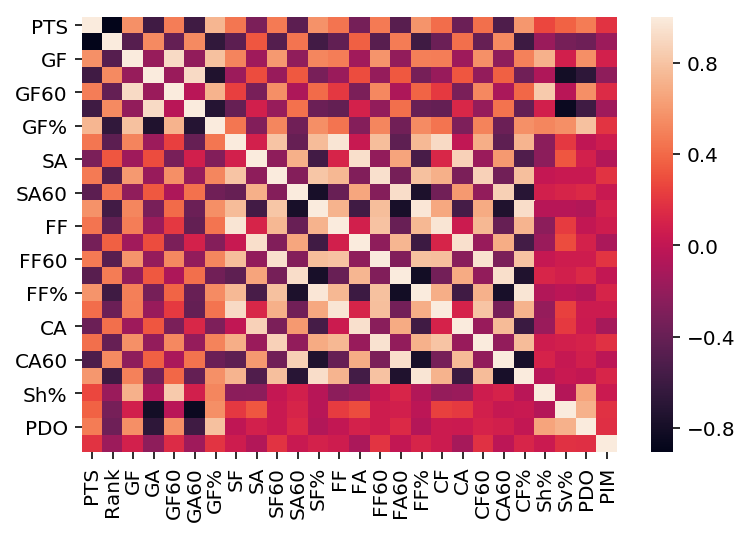

In [13]:
# A:

sns.heatmap(df.corr())

### 3. Set up the `Rank` variable as your target. How many classes are there?

In [18]:
# A:

df['Rank'].unique()

array([1, 2, 3])

### 4. What is the baseline accuracy?

In [25]:
# A:

pd.Series(df['Rank']).value_counts()/len(df['Rank'])

#basline accuracy is approx what % your data is. since 3 is 34%, it /
#doesn't help if we can predict that 34% of data is 3 

3    0.344444
2    0.333333
1    0.322222
Name: Rank, dtype: float64

### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [145]:
# A:

df_new = df[['CF%', 'GF', 'Sh%', 'PDO']]
df_new.head()

print df_new.shape
print df['Rank'].shape

(90, 4)
(90,)


### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [146]:
# A:

from sklearn.neighbors import KNeighborsClassifier

target = df['Rank']
features = df_new

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(features, target)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [147]:
# A:

#pull some samples

NHL_samples = df_new.sample(5)
print 'predictions:', knn.predict(NHL_samples)
print 'actual:', target[NHL_samples.index]

#looks pretty accurate

predictions: [1 2 3 2 1]
actual: 14    1
33    2
71    3
31    2
21    1
Name: Rank, dtype: int64


In [148]:
knn.score(features,target)

1.0

In [149]:
y_hat = knn.predict(features)
(y_hat == target).mean()

1.0

### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [150]:
# A:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=99, test_size=0.5)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

print 'knn score:', knn.score(x_test, y_test)
# print 'y test:', y_test
# print 'prediction:', knn.predict(x_test)


knn score: 0.511111111111


In [151]:
x_train.shape[0]

45

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [166]:
# A:

score = []

for k in range (1,67):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    print (k, knn.score(x_test, y_test))
    score.append((k, knn.score(x_test, y_test)))

(1, 0.51111111111111107)
(2, 0.51111111111111107)
(3, 0.44444444444444442)
(4, 0.44444444444444442)
(5, 0.44444444444444442)
(6, 0.53333333333333333)
(7, 0.55555555555555558)
(8, 0.57777777777777772)
(9, 0.57777777777777772)
(10, 0.55555555555555558)
(11, 0.53333333333333333)
(12, 0.51111111111111107)
(13, 0.51111111111111107)
(14, 0.51111111111111107)
(15, 0.51111111111111107)
(16, 0.53333333333333333)
(17, 0.51111111111111107)
(18, 0.44444444444444442)
(19, 0.51111111111111107)
(20, 0.57777777777777772)
(21, 0.57777777777777772)
(22, 0.55555555555555558)
(23, 0.51111111111111107)
(24, 0.53333333333333333)
(25, 0.48888888888888887)
(26, 0.48888888888888887)
(27, 0.46666666666666667)
(28, 0.48888888888888887)
(29, 0.46666666666666667)
(30, 0.46666666666666667)
(31, 0.46666666666666667)
(32, 0.44444444444444442)
(33, 0.42222222222222222)
(34, 0.42222222222222222)
(35, 0.44444444444444442)
(36, 0.42222222222222222)
(37, 0.44444444444444442)
(38, 0.42222222222222222)
(39, 0.46666666666666

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 45, n_neighbors = 46

### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

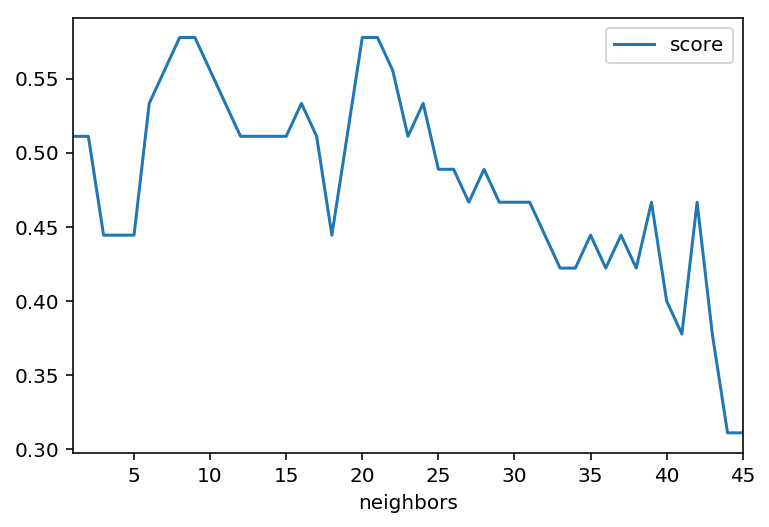

In [153]:
# A:
df_score = pd.DataFrame(score)
df_score.columns = [['neighbors', 'score']]

df_score.plot(x='neighbors', y = 'score', kind='line')

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [161]:
# A:

from sklearn.model_selection import cross_val_score

folds = 5 
max_neighbors = np.floor(features.shape[0] - features.shape[0]/5.)

print max_neighbors

test_acc = []
for i in range (1,int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc.append(np.mean(cross_val_score(knn, features, target, cv=5)))



72.0


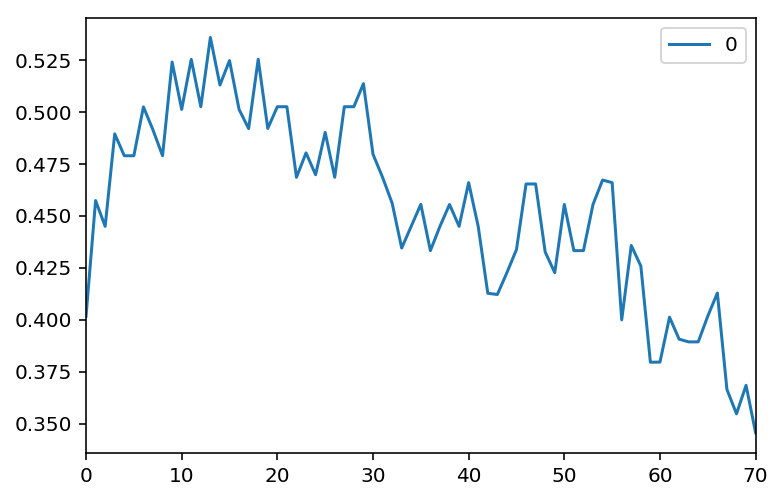

In [165]:
pd.DataFrame(test_acc).plot(kind = 'line')

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [14]:
# A: